In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
%matplotlib inline


In [62]:
#read excep file
data = pd.read_excel('dataset/data_akbilgic.xlsx', header=1)
data = data.rename(columns={'ISE': 'TL_BASED_ISE', 'ISE.1': 'USD_BASED_ISE'})
data = data.drop('date', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 9 columns):
TL_BASED_ISE     536 non-null float64
USD_BASED_ISE    536 non-null float64
SP               536 non-null float64
DAX              536 non-null float64
FTSE             536 non-null float64
NIKKEI           536 non-null float64
BOVESPA          536 non-null float64
EU               536 non-null float64
EM               536 non-null float64
dtypes: float64(9)
memory usage: 37.8 KB


# Find the relationship between features

In [63]:
# we will set our model to predict used_based_ise 
X=data.drop('USD_BASED_ISE', axis=1)
y=data.USD_BASED_ISE

lm = LinearRegression()
lm.fit(X,y)

print('estimated intercepted coefficients:', lm.intercept_)
print ('number of coefficients:', len(lm.coef_))

df = pd.DataFrame(list(zip(X.columns,lm.coef_)), columns=['features','estimatedcoefficient'])
df

estimated intercepted coefficients: -0.00046676937623867597
number of coefficients: 8


,features,estimatedcoefficient
0,TL_BASED_ISE,1.047465
1,SP,0.036071
2,DAX,-0.106571
3,FTSE,-0.152659
4,NIKKEI,0.103193
5,BOVESPA,-0.127844
6,EU,0.314800
7,EM,0.410283


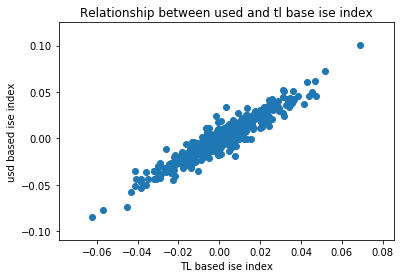

In [64]:
# So in above data we can see that there is high correlation between TL_BASED_ISE and USD_BASED_ISE
plt.scatter(data.TL_BASED_ISE, data.USD_BASED_ISE)
plt.ylabel('usd based ise index')
plt.xlabel('TL based ise index')
plt.title('Relationship between used and tl base ise index')
plt.show()

# Predictive analysis by train test split

In [70]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=33)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(359, 8)
(177, 8)
(359,)
(177,)


In [80]:
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

print("means square error: ", mean_squared_error(y_test, y_test_pred))

means square error:  4.0436643802628556e-05


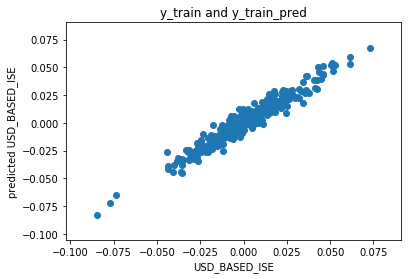

In [84]:
# plot  train and pred train
plt.scatter(y_train, y_train_pred)
plt.title('y_train and y_train_pred')
plt.xlabel('USD_BASED_ISE')
plt.ylabel('predicted USD_BASED_ISE')
plt.show()

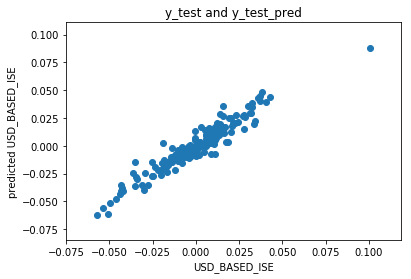

In [85]:
# plot test vs predicted test
plt.scatter(y_test, y_test_pred)
plt.title('y_test and y_test_pred')
plt.xlabel('USD_BASED_ISE')
plt.ylabel('predicted USD_BASED_ISE')
plt.show()

It does look like the predicted price and the actual price are related so the multi-linear regressionis usefull. The spread for each observed value is somewhat wide but there is a relationship. 